This training script was adapted from https://github.com/rishab-sharma/cnn-hand-written-digit/blob/master/train.py

# 1. Declare Imports

In [1]:
import keras as k
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0,8.0) # Make the figures a bit larger

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

# 2. Declare Variables

In [2]:
# 2. Declare Variables
batch_size = 128
# 10 classes represent the numbers 1-9
num_classes = 10
# 12 epochs for training - very short time
epochs = 12
# image dimensions are 28 x 28 pixels
img_rows, img_cols = 28, 28

# 3. LOAD DATA

In [3]:
''' Very easy using keras as mnist is built in
    Split data into taining and test sets
'''
(x_train, y_train), (x_test, y_test) = k.datasets.mnist.load_data()

In [4]:
# https://keras.io/backend/
# For 3D data:
# Channels_first assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # Otherwise we assume its channels_last and uses (conv_dim1, conv_dim2, conv_dim3, channels)
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
# Lets test some of the data
print("Length of x_train: %s" % type(x_train)) # a numpy matrix perfect for keras
print("Length of x_train: %d" % len(x_train)) # 60000
print(len(x_test), len(y_test)) # 10000, 10000
print(y_train[0:20]) # The first 20 classes in y_train

Length of x_train: <class 'numpy.ndarray'>
Length of x_train: 60000
10000 10000
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


# 4. FORMAT THE DATA FOR TRAINING

In [6]:
# Scale the inputs to be in the range [0-1] rather than [0-255]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 5. CONVERT THE MATRICES INTO ONE HOT FORMAT

In [7]:
'''
https://keras.io/utils/
Using .to_categorical Converts a class vector (integers) to binary class matrix.
Keras.utils.to_categorical(y, num_classes=None)
'''
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

# Print the first 10 elements of y_train
print("First 10 Elements in y_train:")
print(y_train[0:10])

First 10 Elements in y_train:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


# 6. BUILD THE NEURAL NETWORK

In [8]:
model = k.models.Sequential()
# This layer creates a convolution kernel that is coiled with the layer input 
# over a single spatial (or temporal) dimension to produce a tensor of outputs.
# https://keras.io/layers/convolutional/
model.add(k.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Add another Convolutional layer
model.add(k.layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling operation for spatial data.
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))
# Randomly turn neurons on and off to improve convergence
model.add(k.layers.Dropout(0.25))
# Flattens the input without effecting the batch size. https://keras.io/layers/core/#flatten
model.add(k.layers.Flatten())
# Just a regular densely-connected NN layer. https://keras.io/layers/core/
model.add(k.layers.Dense(128, activation='relu'))
# Add another dropout
model.add(k.layers.Dropout(0.5))
# Add the softmax activation function to the final layer
model.add(k.layers.Dense(num_classes, activation='softmax'))

# 7. COMPILE THE MODEL

In [9]:
model.compile(loss=k.losses.categorical_crossentropy, optimizer=k.optimizers.Adadelta(), metrics=['accuracy'])

# 8. FIT THE MODEL

In [10]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 136s 2ms/step - loss: 0.3326 - acc: 0.8979 - val_loss: 0.0764 - val_acc: 0.9759
Epoch 2/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1132 - acc: 0.9667 - val_loss: 0.0568 - val_acc: 0.9815
Epoch 3/12
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0877 - acc: 0.9740 - val_loss: 0.0441 - val_acc: 0.9854
Epoch 4/12
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0719 - acc: 0.9788 - val_loss: 0.0383 - val_acc: 0.9870
Epoch 5/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0636 - acc: 0.9810 - val_loss: 0.0344 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0572 - acc: 0.9836 - val_loss: 0.0337 - val_acc: 0.9885
Epoch 7/12
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0520 - acc: 0.9847 - val_loss: 0.0310 - 

# 9. How well did it do? 

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
y_pred = model.predict_classes(x_test)

# How many did we get wrong?!
true_indices = np.nonzero(y_pred == y_test)[0]
false_indices = np.nonzero(y_pred != y_test)[0]
print("Number of false predictions = %d (out of %d samples)" % (len(false_indices), len(y_test)))

Test loss: 0.0267146403608
Test accuracy: 0.9911
10000/10000 [==============================] - 6s 599us/step
Number of false predictions = 1 (out of 10000 samples)


c:\users\patrick\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
c:\users\patrick\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


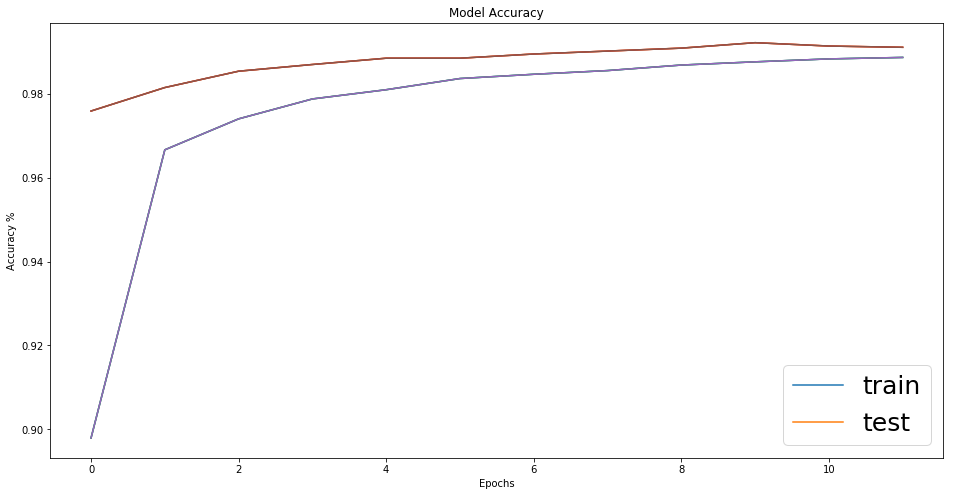

In [17]:
# Summarize History for Accuracy
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy %')  
plt.xlabel('Epochs')  
plt.legend(['train', 'test'], loc='lower right', fontsize=25)
plt.show()

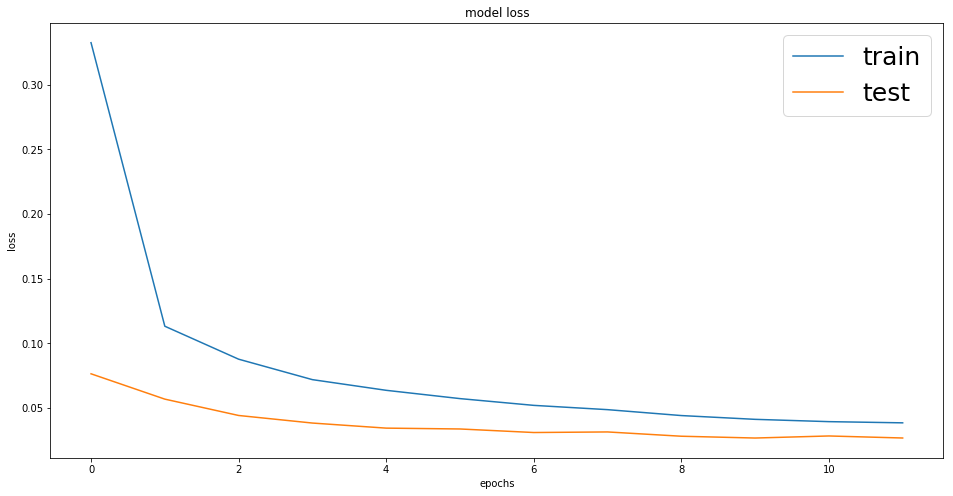

In [18]:
# Summarize history for loss     
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epochs')  
plt.legend(['train', 'test'], loc='upper right', fontsize=25)  
plt.show()

# 10. Save the model to Disk

In [19]:
# 10. Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("MODEL SAVED!")

MODEL SAVED!
